In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [136]:
import os
os.chdir("C:\\Users\\kaust\\OneDrive\\Desktop\\upgrad\\Polynomial_Regression_and_Data_Transformation")

In [137]:
# reading the data
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

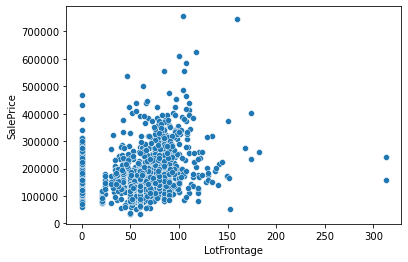

In [141]:
sns.scatterplot(data = data, x='LotFrontage', y = 'SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

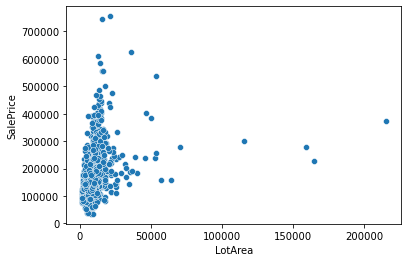

In [142]:
sns.scatterplot(data = data, x='LotArea', y = 'SalePrice') ## No Rel

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

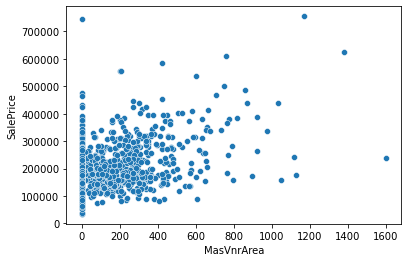

In [143]:
sns.scatterplot(data = data, x='MasVnrArea', y = 'SalePrice')

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

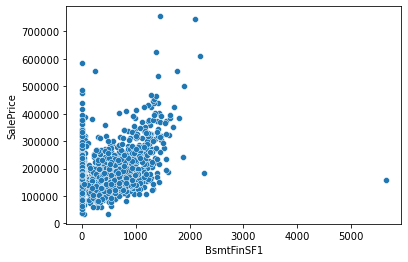

In [144]:
sns.scatterplot(data = data, x='BsmtFinSF1', y = 'SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

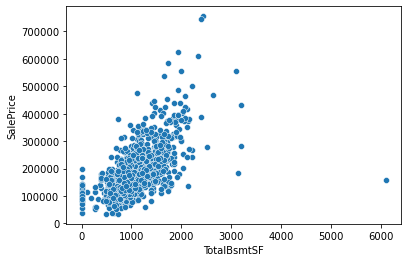

In [145]:
sns.scatterplot(data = data, x='TotalBsmtSF', y = 'SalePrice') 

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

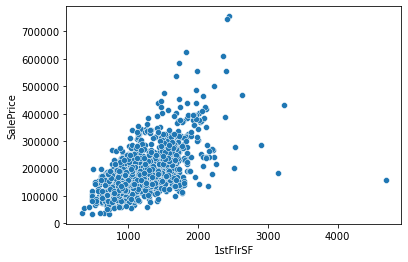

In [146]:
sns.scatterplot(data = data, x='1stFlrSF', y = 'SalePrice')

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

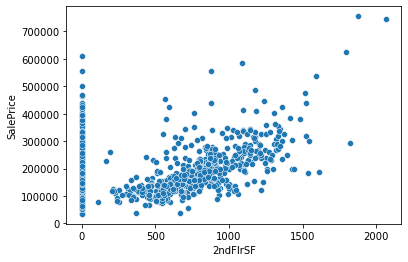

In [147]:
sns.scatterplot(data = data, x='2ndFlrSF', y = 'SalePrice')

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

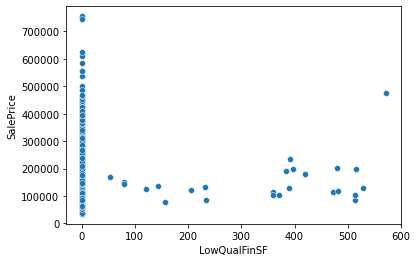

In [148]:
sns.scatterplot(data = data, x='LowQualFinSF', y = 'SalePrice') ## No rel

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

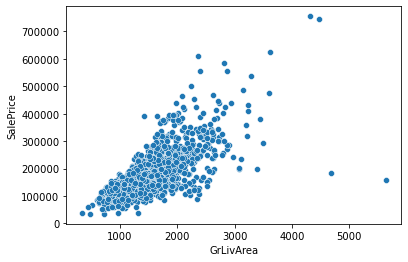

In [149]:
sns.scatterplot(data = data, x='GrLivArea', y = 'SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

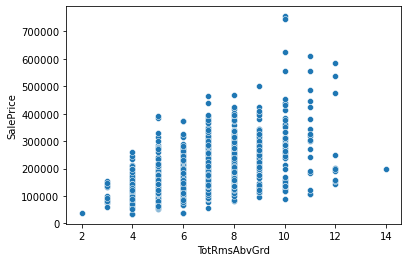

In [150]:
sns.scatterplot(data = data, x='TotRmsAbvGrd', y = 'SalePrice') ## No rel

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

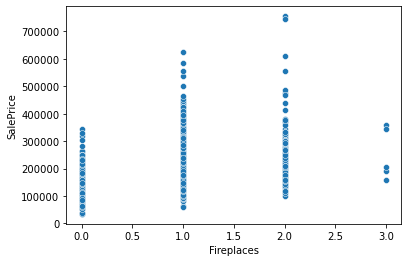

In [151]:
sns.scatterplot(data = data, x='Fireplaces', y = 'SalePrice') ## No rel

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

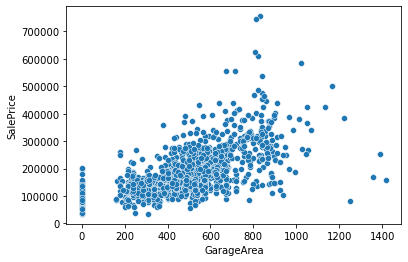

In [152]:
sns.scatterplot(data = data, x='GarageArea', y = 'SalePrice')

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

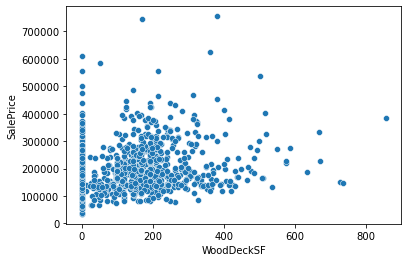

In [153]:
sns.scatterplot(data = data, x='WoodDeckSF', y = 'SalePrice')

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

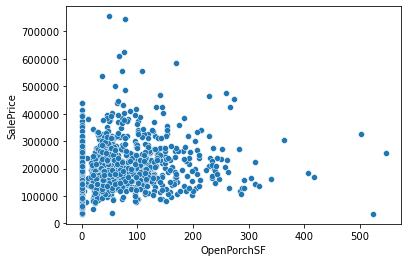

In [154]:
sns.scatterplot(data = data, x='OpenPorchSF', y = 'SalePrice')

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

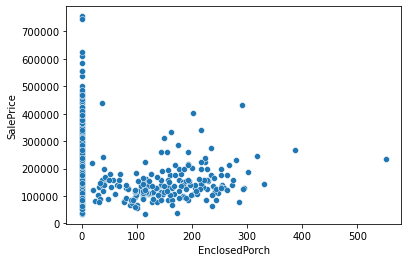

In [155]:
sns.scatterplot(data = data, x='EnclosedPorch', y = 'SalePrice') # No rel

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

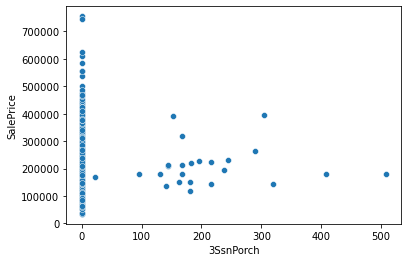

In [156]:
sns.scatterplot(data = data, x='3SsnPorch', y = 'SalePrice') # No rel

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

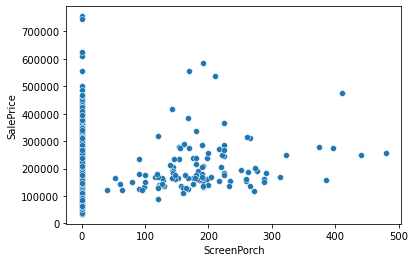

In [157]:
sns.scatterplot(data = data, x='ScreenPorch', y = 'SalePrice') # No rel

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

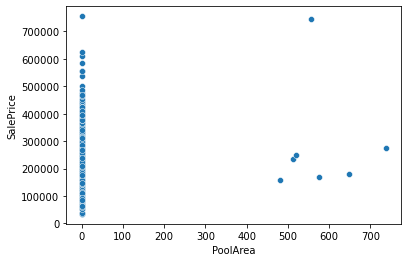

In [158]:
sns.scatterplot(data = data, x='PoolArea', y = 'SalePrice') # No rel

## Building a Linear Regression Model

In [159]:
## Var = ['LotFrontage', 'MasVnrArea',TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']

In [176]:
X = data[['LotFrontage', 'MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']]
y = np.array(data['SalePrice']).reshape(-1,1)

In [177]:
X.isnull().sum()

LotFrontage    0
MasVnrArea     0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
dtype: int64

In [178]:
## Building Regression Model
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [179]:
## Building Regression Model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [180]:
## Prediction on the basis of Model
y_pred = reg.predict(X)
y_pred

array([[193042.15756594],
       [177351.73862846],
       [203067.11577965],
       ...,
       [208595.09631198],
       [142658.53177175],
       [189595.57872832]])

In [181]:
r2_score(y, y_pred)

0.6856262760215994

In [182]:
# Residual Sum of Squares = Mean_Squares_Error * Total Number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
# Root mean square Error
rmse = mse**0.5
print(rmse)

2894725376324.2627
1982688613.920728
44527.39172600084


In [183]:
poly = PolynomialFeatures(3)
Y = poly.fit_transform(X)
print(Y)

[[1.0000000e+00 6.5000000e+01 1.9600000e+02 ... 0.0000000e+00
  0.0000000e+00 2.2698100e+05]
 [1.0000000e+00 8.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 6.8000000e+01 1.6200000e+02 ... 0.0000000e+00
  0.0000000e+00 7.4088000e+04]
 ...
 [1.0000000e+00 6.6000000e+01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.1600000e+05]
 [1.0000000e+00 6.8000000e+01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 7.5000000e+01 0.0000000e+00 ... 3.6835328e+07
  3.4032640e+06 3.1443200e+05]]


In [184]:
# Building the polynomial regression model with degree 5
degree = 5
polyreg5 = PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X)
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y)

LinearRegression()

In [186]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X))
print(r2_score(y, y_pred5))

0.992393400762063


In [187]:
# Metrics to assess model performance
rss = np.sum(np.square(y - y_pred5))
print(rss)
mse = mean_squared_error(y,y_pred5)
print(mse)
rmse = mse **0.5
# Root mean square
print(rmse)

70040891340.83597
47973213.247147925
6926.269793124429


In [191]:
#Model coefficient of specific lambda = 0.001 
# Ridge Regression
ridgecoef = PolynomialFeatures(degree, include_bias= True)
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha=0.001)
ridgereg.fit(X_poly, y)
print(ridgereg.coef_)
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
print("r2_score= " + str(r2_score(y,y_pred)))


[[ 0.00000000e+00 -2.99105046e-17 -8.09104119e-18 ...  8.98527755e-09
   1.28344818e-08 -1.06915717e-08]]
r2_score= 0.9003908493979504


In [192]:
#Model coefficient of specific lambda = 0.001 
# Ridge Regression
ridgecoef = PolynomialFeatures(degree, include_bias= True)
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha=0.01)
ridgereg.fit(X_poly, y)
print(ridgereg.coef_)
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
print("r2_score= " + str(r2_score(y,y_pred)))

[[ 0.00000000e+00 -2.99105046e-17 -8.09104119e-18 ...  8.98527755e-09
   1.28344818e-08 -1.06915717e-08]]
r2_score= 0.9003908493979504


In [193]:
#Model coefficient of specific lambda = 0.001 
# Ridge Regression
ridgecoef = PolynomialFeatures(degree, include_bias= True)
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha=1.0)
ridgereg.fit(X_poly, y)
print(ridgereg.coef_)
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
print("r2_score= " + str(r2_score(y,y_pred)))

[[ 0.00000000e+00 -2.99105046e-17 -8.09104119e-18 ...  8.98527755e-09
   1.28344818e-08 -1.06915717e-08]]
r2_score= 0.9003908493979504


In [194]:
# Applying Lasso regression with varying parameter 'lambda'
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
lambdas = [0,0.001,0.01,0.1,1,10,100,1000]

for i in lambdas:
    degree = 5
    lassocoef = PolynomialFeatures(degree)
    X_poly = ridgecoef.fit_transform(X)
    lassoreg = Lasso(alpha=i)
    lassoreg.fit(X_poly, y)
    # Compute the r2 score
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("r2_score= " + str(r2_score(y,y_pred)))
    print(lassoreg.coef_)

r2_score= 0.8844726864604426
[ 0.00000000e+00 -7.11966585e+01 -2.68775122e+01 ...  5.94745274e-08
 -3.52038636e-08 -6.48363087e-09]
r2_score= 0.884472686489113
[ 0.00000000e+00 -7.11965710e+01 -2.68775093e+01 ...  5.94745275e-08
 -3.52038639e-08 -6.48363081e-09]
r2_score= 0.8844726867471462
[ 0.00000000e+00 -7.11957842e+01 -2.68774834e+01 ...  5.94745290e-08
 -3.52038664e-08 -6.48363027e-09]
r2_score= 0.8844726893273651
[ 0.00000000e+00 -7.11879160e+01 -2.68772246e+01 ...  5.94745434e-08
 -3.52038914e-08 -6.48362485e-09]
r2_score= 0.8844727151039213
[ 0.00000000e+00 -7.11092355e+01 -2.68746362e+01 ...  5.94746884e-08
 -3.52041410e-08 -6.48357064e-09]
r2_score= 0.8844729710818447
[ 0.00000000e+00 -7.03221818e+01 -2.68487659e+01 ...  5.94761626e-08
 -3.52066118e-08 -6.48302843e-09]
r2_score= 0.8844753505613329
[ 0.00000000e+00 -6.24323459e+01 -2.65916440e+01 ...  5.94927042e-08
 -3.52295106e-08 -6.47760095e-09]
r2_score= 0.8844843938065208
[ 0.00000000e+00 -0.00000000e+00 -2.35076839e+01